# BASIC

Some commonly used funtions

In [ ]:
from known import basic

In [ ]:
# Example - now() function generates a formated date-time string based on current date-time
# this can be used to generate unique file names e.g.,
filename = basic.now(
    year=True,
    month=True,
    day=True,
    hour=True,
    minute=True,
    second=True,
    mirco=True,
    start="image_", sep="_", end=".png"
)
print(filename)

In [ ]:
# Example - numel() returns no of elements in an array of given shape 
# same as (product of dimensions)
shape = (3,4,5)
n = basic.numel(shape)
print(n)

In [ ]:
#  Example - arange() is similar to numpy.arange except that it accepts a shape
# and produces multi dim arrays
arr = basic.arange(
    shape=(3,4,5),
    start=10, step=2,
    dtype='int'
)
print(arr,'\n\n', basic.numel(arr.shape))

In [ ]:
# Example - Symbols class provides some special symbols
syms = basic.Symbols.__dict__
for k,v in syms.items():
    if not (k.startswith('__') and k.endswith('__')):  print(f'{v}\t{k}')

In [ ]:
#  Example - Remap allows to map values from one range to another

# suppose we want to map values from (100, 300) to range (-1, 1)
r = basic.Remap(Input_Range=(100, 300), Output_Range=(-1, 1))

for x in range(100, 350, 50):
    a = r.forward(x)
    b = r.backward(a)
    print(f'{x} -> {a} -> {b} :: {x-b}')
    assert(x-b==0)

#  Example - this works with numpy arrays
import numpy as np

l, h = np.array([200, 100, 50]), np.array([300, 150, 75])
r = basic.Remap(
    Input_Range=(l, h), 
    Output_Range=(np.array([-1, 0, -1]), np.array([1, 1, 0]))
    )

for _ in range(5):
    x = np.random.uniform(l, h)
    a = r.forward(x)
    b = r.backward(a)
    print(f'{x} -> {a} -> {b} :: {x-b}')
    assert((x-b).all()==0)
    

In [ ]:
#  Example - IndexedDict is a special dictionary that stores indices of items as well
# items can be accesed by both key(str) and index(int)
D = basic.IndexedDict(
    **dict(
        a = 1,
        b = '2',
        c = 3.0,
        d = [1, '2', 3.0],
    )
)
print(D)

print('\nItems')
for i,(k,v) in D.items(): print(f'{i=}, {k=}, {v=}')

print('\nKeys')
for i,k in D.keys(): print(f'{i=}, {k=}, {D[k]=}, {D[i]=}')

### serialization and io

In [ ]:
#  Example - use json to serialize and save objects
# NOTE: objects must be JSON serializable
# TIP: use json to save simple objects such as lists, tuples dicts etc

A = dict(a=1, b='2')
B = [1, '2']
C = tuple(B) #<--- note - tuples are serialized as lists

basic.save_json(A, 'A')
basic.save_json(B, 'B')
basic.save_json(C, 'C')

AA = basic.load_json('A')
BB = basic.load_json('B')
CC = basic.load_json('C')

assert(A==AA)
assert(B==BB)
assert(C==tuple(CC)) #<--- note - tuples are serialized as lists

In [ ]:
#  Example - use pickle to serialize and save objects
# NOTE: objects must be pickle serializable
# TIP: use pickle to save complex objects including ndarray and tensors

import numpy as np
import torch as tt
class TestClass:
    def __init__(self): self.x, self.y, self.z = 1, [1,2,3], dict(a=1, b='2')
    def __call__(self): return [self.x, self.z['b']] + self.y + [self.z['a']]
    
A = np.random.random((3,4))
B = tt.rand(size=(4,3))
C = TestClass()


basic.save_pickle(A, 'A')
basic.save_pickle(B, 'B')
basic.save_pickle(C, 'C')

AA = basic.load_pickle('A')
BB = basic.load_pickle('B')
CC = basic.load_pickle('C')

assert(np.sum(np.abs(A - AA))==0.0)
assert(tt.sum(tt.abs(B - BB))==0.0)

for c,cc in zip(C(), CC()):  assert(c==cc)


In [ ]:
# dict_sort() sorts keys and values of a dict based on ordering of values

D = dict(
    a = 1.5,
    b = 2.0,
    c = 1,
)
DD = basic.dict_sort(D, assending=True)
DDD = basic.dict_sort(D, assending=False)
print(D)
print(DD)
print(DDD)

# BaseConvert

for number system converision

In [ ]:
from known.basic import BaseConvert as bc


In [ ]:
# Example_1 - convert b/w base 10 and any base b

# convert an integer to given base
b2 = bc.int2base(
    num=205,  # number to be converted
    base=2, # to base 
    digs=0, # number of digits in the output, keep 0 to automatically decide)
) # this will return an array of digits in binary (should be read in reverse)
print(f'B Array: {b2}')
print(f'B String:',''.join([f'{n}' for n in b2][::-1]))
# convert back to integer
b10 = bc.base2int(num=b2, base=2)
print(f'Integer: {b10}')




In [ ]:
# Example_2 -  we can conver to higher bases, e.g. - IP addresses are 4 digit numbers in base-256

# convert an integer to given IP address
b256 = bc.int2base(
    num=3232247141,  #number to be converted
    base=256, #to base 
    digs=4, # number of digits in the output, keep 0 to automatically decide)
) # this will return an array of digits in binary (should be read in reverse)
print(f'B Array: {b256}')
print(f'B String:','.'.join([f'{n}' for n in b256][::-1]))

# convert back to integer
b10 = bc.base2int(num=b256, base=256)
print(f'Integer: {b10}')


In [ ]:

#  Example_3 - convert an ip address to its integer form
ip = '192.168.45.101'
ip_list = ip.split('.')[::-1] # the converter expects reversed array
bip = bc.base2int([int(i) for i in ip_list], base=256)
print(f'{ip} --> {bip}')

In [ ]:
#  Example_4 - we can use other symbols as well, e.g., converting a hex-color code

hex_code = '6f084e'.upper()
# get an integer corresponding to hexcode
b_hex_to_int = bc.to_base_10(
    syms=bc.SYM_HEX, # a symbols dictionary that map symbols to its value (base-10 digits)
    num=hex_code, # the hex-code as string
)
print(f'Integer: {b_hex_to_int}')

# convert to a color which is a 3-tuple (r,g,b) in base-256 
b,g,r = bc.int2base(num=b_hex_to_int, base=256, digs=3) #<--- NOTE: returns in reverse (bgr)
print(f'RGB: {r,g,b}')

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.yticks([])
plt.bar([hex_code], [1], color=(r/255, g/255, b/255, 1.0))
plt.show()

# IMGU

Some image related utilities

In [1]:
from known.imgu import Pix
#import matplotlib.pyplot as plt

In [2]:
# Example - Pix object abstracts a 4-channel image in BRGA format using cv2

pix = Pix(h=10, w=20) # create a new 4-channel image


# save the image
Pix.save(pix, 'image.png')


pix.i.shape # pix.i is the underlying array

(10, 20, 4)

In [3]:
# load the image
img=Pix.load('image.png')


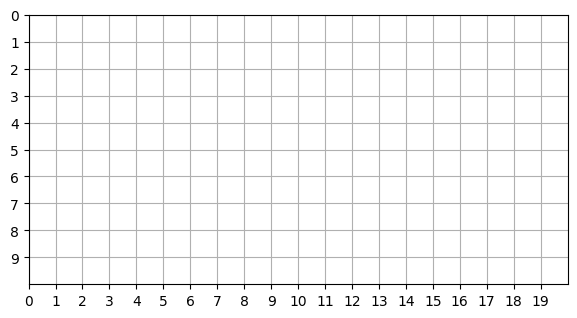

In [4]:

# plot it
Pix.plot(img, ratio=0.35)

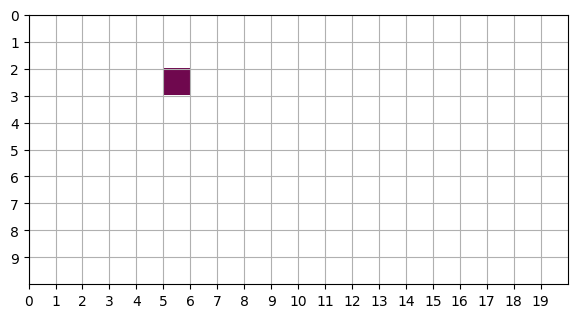

True

In [5]:

# draw some points on image
img.set_hex_at(2, 5, '6f084e')

Pix.plot(img, ratio=0.35)

Pix.save(img, 'image.png')

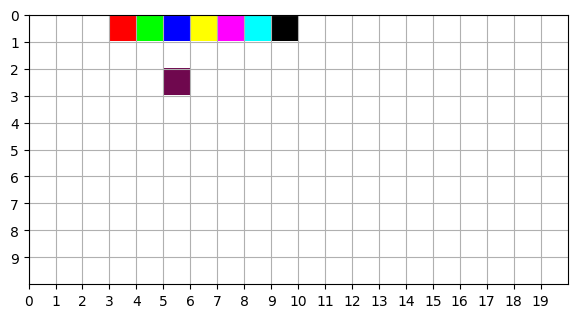

True

In [6]:
# draw some points on image
img.set_color_at(0,3, (255, 0, 0, 255), normalize=False)
img.set_color_at(0,4, (0, 255, 0, 255), normalize=False)
img.set_color_at(0,5, (0, 0, 255, 255), normalize=False)
img.set_color_at(0,6, (255, 255, 0, 255), normalize=False)
img.set_color_at(0,7, (255, 0, 255, 255), normalize=False)
img.set_color_at(0,8, (0, 255, 255, 255), normalize=False)
img.set_color_at(0,9, (0, 0, 0, 255), normalize=False)
#p.draw_points(img, (0,3), (3,0), (2,7), (-3, -4))
Pix.plot(img, ratio=0.35)

Pix.save(img, 'image.png')

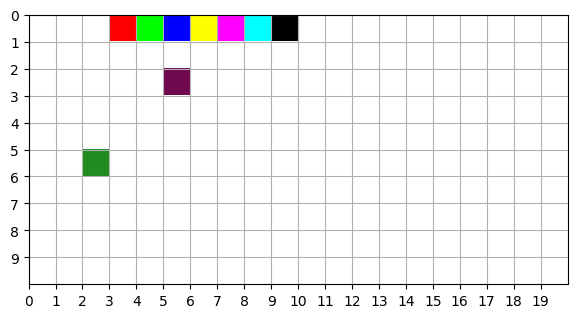

True

In [7]:
# we can use matplot lib's colors too

import matplotlib.colors as mcolors
color_dict = mcolors.CSS4_COLORS


# draw some points on image
img.set_hex_at(5, 2, color_dict['forestgreen'])

Pix.plot(img, ratio=0.35)

Pix.save(img, 'image.png')





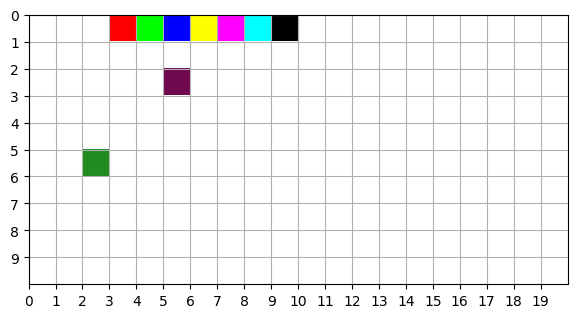

In [8]:
# load the image again
img=Pix.load('image.png')

# plot it
Pix.plot(img, ratio=0.35)

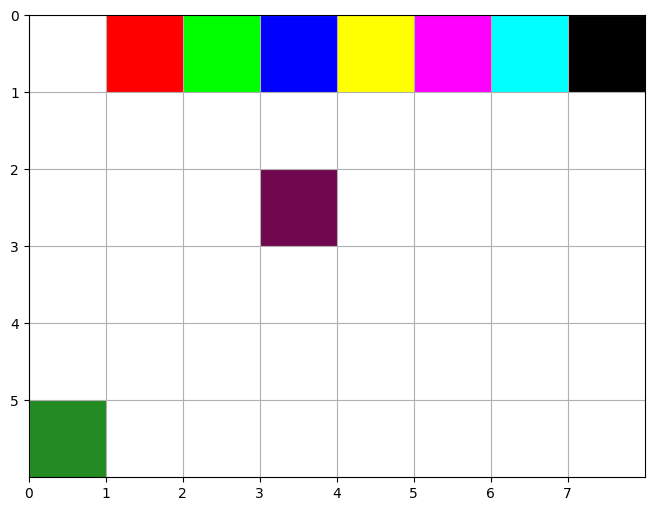

True

In [9]:
simg = Pix.region(img, 0, 2 , 6, 8)
Pix.plot(simg, ratio=1.0)
Pix.save(simg, 'simage.png')

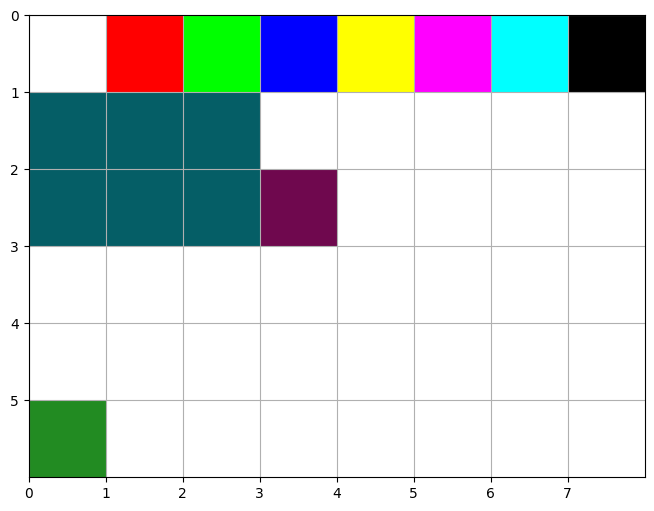

In [10]:
simg.set_hex_in(1, 0, 2, 3, '055E66')
Pix.plot(simg, ratio=1.0)

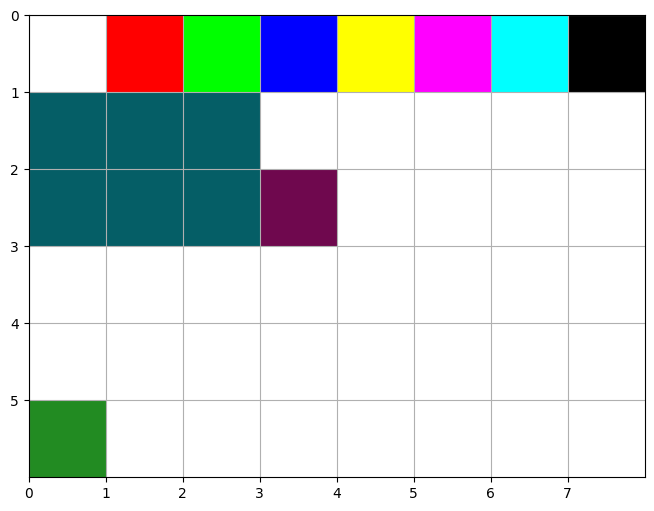

In [11]:
cimg = simg.clone()
Pix.plot(cimg, ratio=1.0)

In [ ]:
for k,v in color_dict.items(): print(k, v)

# E-MAIL

Send mail from your gmail account using python.

* This requires either 
    * entering your login credentials directly in code, or,
    * saving your login credentials on machine in pickle format. 
* You should enable 2-factor-auth in gmail and generate an app-password instead of using your gmail password.
* Visit (https://myaccount.google.com/apppasswords) to generate app-password.
* Usually, these type of emails are treated as spam by google, so they must be marked 'not spam' at least once.
* It is recomended to create a seperate gmail account for sending mails.

In [ ]:
from known.mailer import Mail

## simply send a mail

In [ ]:
# To send an email, use the Mail.send() method as shown below

Mail.send( #<--- this is a static method

# sender's email address (MUST BE a gmail account)
username = 'username@gmail.com',   

# password (NOTE: use app password instead of your real password)
password = 'password',    

# subject line
subject = 'subject',    

# recievers - (comma seperated e-mail addresses)
rx = 'rx_01@domain.com, rx_02@domain.com, rx_03@domain.com',  

# carbon copy - (comma seperated e-mail addresses)
cc = 'cc_01@domain.com, cc_02@domain.com, cc_03@domain.com',     

# blind carbon copy - (comma seperated e-mail addresses)
bcc = 'bcc_01@domain.com, bcc_02@domain.com, bcc_03@domain.com',  

# a string of content i.e., the body of msg goes here
content = """
Dear Reciever,
    This is a test email sent using python!
    Some content goes in here.

Warm Regards,
Sender
""", 

# list of 'attachements', where each 'attachement' is a 2-tuple of ( zip_name:str, (file_names,):tuple )
# first item of attachement is a string representing the name of zip file to be created
# second item of attachement is an n-tuple of file names to be zipped/attached
attached =  [  
                # e.g., if zip file name is specified then all the files will be compressed into a zip file and the zip file will be attached
                ('attachement.zip',  ('file_01.png', 'file_02.pdf', 'file_03.txt') ) ,

                # e.g., if zip file name is NOT specified then all the files will be attached individually
                ('',                 ('file_01.png', 'file_02.pdf', 'file_03.txt') ) ,
            ],

# prints information while sending mail
verbose = True,

)

## send a mail with login function

In [ ]:
# the Mail.send() function uses 'compose_mail()' and 'send_mail()' methods from the class
# these can be diretcly used as shown below


# (1) Compose a msg - compoase_mail() returns an email msg that can be sent using send_mail()
msg = Mail.compose_mail( #<--- this is a static method

# subject line
subject = 'subject',    

# recievers - (comma seperated e-mail addresses)
rx = 'rx_01@domain.com, rx_02@domain.com, rx_03@domain.com',  

# carbon copy - (comma seperated e-mail addresses)
cc = 'cc_01@domain.com, cc_02@domain.com, cc_03@domain.com',     

# blind carbon copy - (comma seperated e-mail addresses)
bcc = 'bcc_01@domain.com, bcc_02@domain.com, bcc_03@domain.com',  

# a string of content i.e., the body of msg goes here
content = """
Dear Reciever,
    This is a test email sent using python!
    Some content goes in here.

Warm Regards,
Sender
""", 

# list of 'attachements', where each 'attachement' is a 2-tuple of ( zip_name:str, (file_names,):tuple )
# first item of attachement is a string representing the name of zip file to be created
# second item of attachement is an n-tuple of file names to be zipped/attached
attached =  [  
                # e.g., if zip file name is specified then all the files will be compressed into a zip file and the zip file will be attached
                ('attachement.zip',  ('file_01.png', 'file_02.pdf', 'file_03.txt') ) ,

                # e.g., if zip file name is NOT specified then all the files will be attached individually
                ('',                 ('file_01.png', 'file_02.pdf', 'file_03.txt') ) ,
            ],

# prints information while sending mail
verbose = True,

)

# (2) Send the msg - using a gmail account
Mail.send_mail( #<--- this is a static method

# login function <--- can be replaced by any custom function
login = lambda : ('username@gmail.com', 'password'), 
# NOTE: here login is a function, when called (with no args) returns a 2-tuple (username, password)

# the msg returned bu compose_mail()
msg = msg, 

# prints information while sending mail
verbose = True,

)

## send a mail with saved credentials

In [ ]:
# we can save the gmail credentials in a pickel file, and use it in the future to send mails

# (1) save your login on disk (one-time call)
Mail.save_login('login.gmail') #<--- this will ask you to enter username and password in input boxes

In [ ]:
# send mail using a credentail file 

# (2) create an instance of Mail class
mailer = Mail(

# the path to login file created using Mail.save_login()
login_path = 'login.gmail', 

# NOTE: if signature = None, it is automatically generated based on system information (see Mail.global_alias())
# to avoid using signature set it to an empty string, signature = ''
signature = 'Warm Regards,\nSender',

# prints information while sending mail
verbose = True,
)


# (3) call the Mail object to send mail
mailer(

# subject line
subject = 'subject',    

# recievers - (comma seperated e-mail addresses)
rx = 'rx_01@domain.com, rx_02@domain.com, rx_03@domain.com',  

# carbon copy - (comma seperated e-mail addresses)
cc = 'cc_01@domain.com, cc_02@domain.com, cc_03@domain.com',     

# blind carbon copy - (comma seperated e-mail addresses)
bcc = 'bcc_01@domain.com, bcc_02@domain.com, bcc_03@domain.com',  

# a string of content i.e., the body of msg goes here
content = """
Dear Reciever,
    This is a test email sent using python!
    Some content goes in here.

Warm Regards,
Sender
""", 

# list of 'attachements', where each 'attachement' is a 2-tuple of ( zip_name:str, (file_names,):tuple )
# first item of attachement is a string representing the name of zip file to be created
# second item of attachement is an n-tuple of file names to be zipped/attached
attached =  [  
                # e.g., if zip file name is specified then all the files will be compressed into a zip file and the zip file will be attached
                ('attachement.zip',  ('file_01.png', 'file_02.pdf', 'file_03.txt') ) ,

                # e.g., if zip file name is NOT specified then all the files will be attached individually
                ('',                 ('file_01.png', 'file_02.pdf', 'file_03.txt') ) ,
            ],
)